In [3]:
import requests

url = "https://www.openml.org/data/download/22102255/dataset"
r = requests.get(url, allow_redirects=True)

In [4]:
with open ("dataset.txt", "wb") as f:
    f.write(r.content)

In [5]:
import pandas as pd

In [6]:
data = []

with open("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@") or line.startswith("%") or line == "":
            continue
        data.append(line)

In [7]:
columns = []

with open("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])

In [10]:
columns

['time_left',
 'ct_score',
 't_score',
 'map',
 'bomb_planted',
 'ct_health',
 't_health',
 'ct_armor',
 't_armor',
 'ct_money',
 't_money',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'ct_weapon_ak47',
 't_weapon_ak47',
 'ct_weapon_aug',
 't_weapon_aug',
 'ct_weapon_awp',
 't_weapon_awp',
 'ct_weapon_bizon',
 't_weapon_bizon',
 'ct_weapon_cz75auto',
 't_weapon_cz75auto',
 'ct_weapon_elite',
 't_weapon_elite',
 'ct_weapon_famas',
 't_weapon_famas',
 'ct_weapon_g3sg1',
 't_weapon_g3sg1',
 'ct_weapon_galilar',
 't_weapon_galilar',
 'ct_weapon_glock',
 't_weapon_glock',
 'ct_weapon_m249',
 't_weapon_m249',
 'ct_weapon_m4a1s',
 't_weapon_m4a1s',
 'ct_weapon_m4a4',
 't_weapon_m4a4',
 'ct_weapon_mac10',
 't_weapon_mac10',
 'ct_weapon_mag7',
 't_weapon_mag7',
 'ct_weapon_mp5sd',
 't_weapon_mp5sd',
 'ct_weapon_mp7',
 't_weapon_mp7',
 'ct_weapon_mp9',
 't_weapon_mp9',
 'ct_weapon_negev',
 't_weapon_negev',
 'ct_weapon_nova',
 't_weapon_nova',
 'ct_w

In [11]:
with open("df.csv", "w") as f:
    f.write(",".join(columns))
    f.write("\n")
    f.write("\n".join(data))

In [12]:
df = pd.read_csv("df.csv")
df.columns = columns

In [13]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [14]:
df['t_win'] = df.round_winner.astype("category").cat.codes

In [15]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,t_win
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T,1
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df[columns+['t_win']].select_dtypes(include=['number']).corr()
print(correlations['t_win'].apply(abs).sort_values(ascending=False).iloc[:25])

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps                   0.136694
ct_money        

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(correlations[['t_win']].sort_values(by='t_win', ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with T-side Win")
plt.show()

NameError: name 'sns' is not defined

<Figure size 1200x600 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df[columns+['t_win']].select_dtypes(include=['number']).corr()
print(correlations['t_win'].apply(abs).sort_values(ascending=False).iloc[:25])

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps                   0.136694
ct_money        

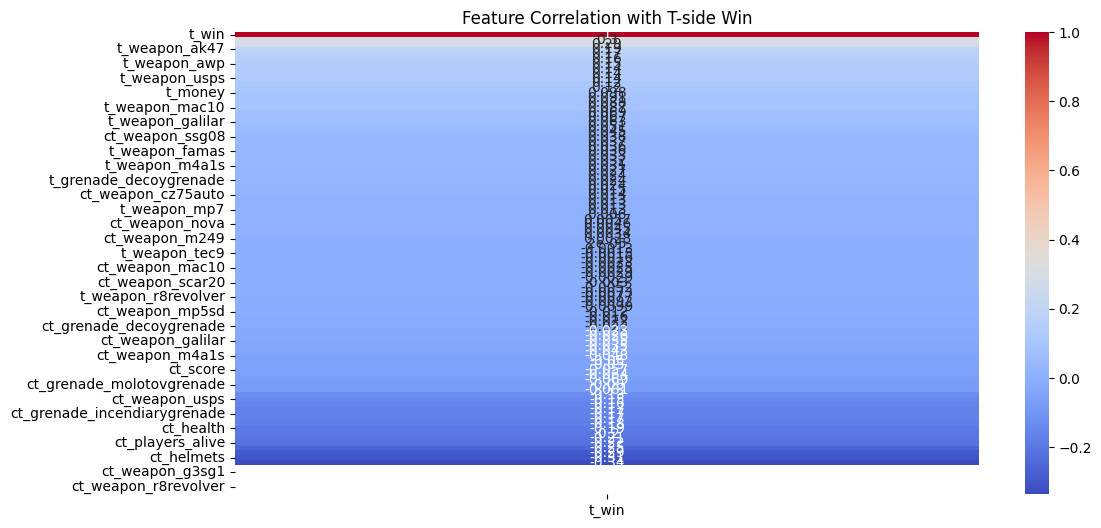

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(correlations[['t_win']].sort_values(by='t_win', ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with T-side Win")
plt.show()

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df[columns+['t_win']].select_dtypes(include=['number']).corr()
print(correlations['t_win'].apply(abs).sort_values(ascending=False).iloc[:25])

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps                   0.136694
ct_money        

In [25]:
selected_columns = []

for col in columns+["t_win"]:
    try:
        if abs(correlations[col]["t_win"]) > 0.15:
            selected_columns.append(col)
    except KeyError:
        pass

df_selected = df[selected_columns]

In [26]:
df_selected

,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1


<Axes: >

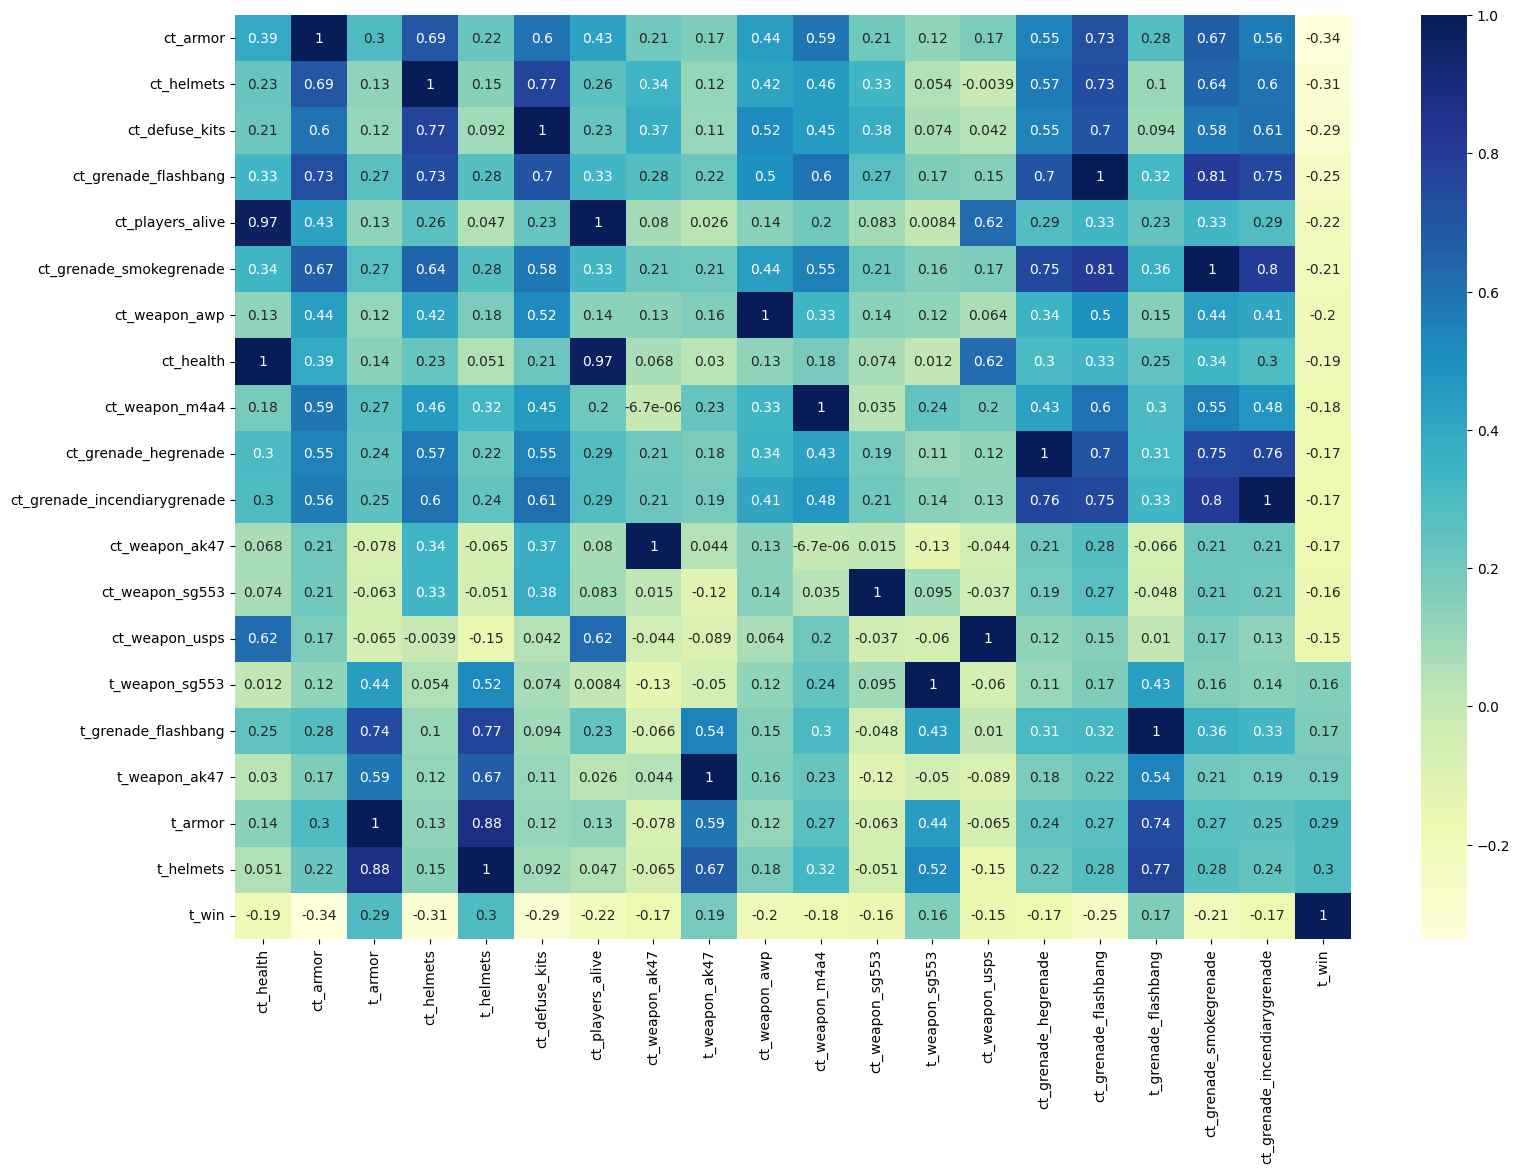

In [27]:
plt.figure(figsize=(18,12))
sns.heatmap(df_selected.corr().sort_values(by="t_win"), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'ct_health'}>,
        <Axes: title={'center': 'ct_armor'}>,
        <Axes: title={'center': 't_armor'}>,
        <Axes: title={'center': 'ct_helmets'}>],
       [<Axes: title={'center': 't_helmets'}>,
        <Axes: title={'center': 'ct_defuse_kits'}>,
        <Axes: title={'center': 'ct_players_alive'}>,
        <Axes: title={'center': 'ct_weapon_ak47'}>],
       [<Axes: title={'center': 't_weapon_ak47'}>,
        <Axes: title={'center': 'ct_weapon_awp'}>,
        <Axes: title={'center': 'ct_weapon_m4a4'}>,
        <Axes: title={'center': 'ct_weapon_sg553'}>],
       [<Axes: title={'center': 't_weapon_sg553'}>,
        <Axes: title={'center': 'ct_weapon_usps'}>,
        <Axes: title={'center': 'ct_grenade_hegrenade'}>,
        <Axes: title={'center': 'ct_grenade_flashbang'}>],
       [<Axes: title={'center': 't_grenade_flashbang'}>,
        <Axes: title={'center': 'ct_grenade_smokegrenade'}>,
        <Axes: title={'center': 'ct_grenade_incendiarygrenad

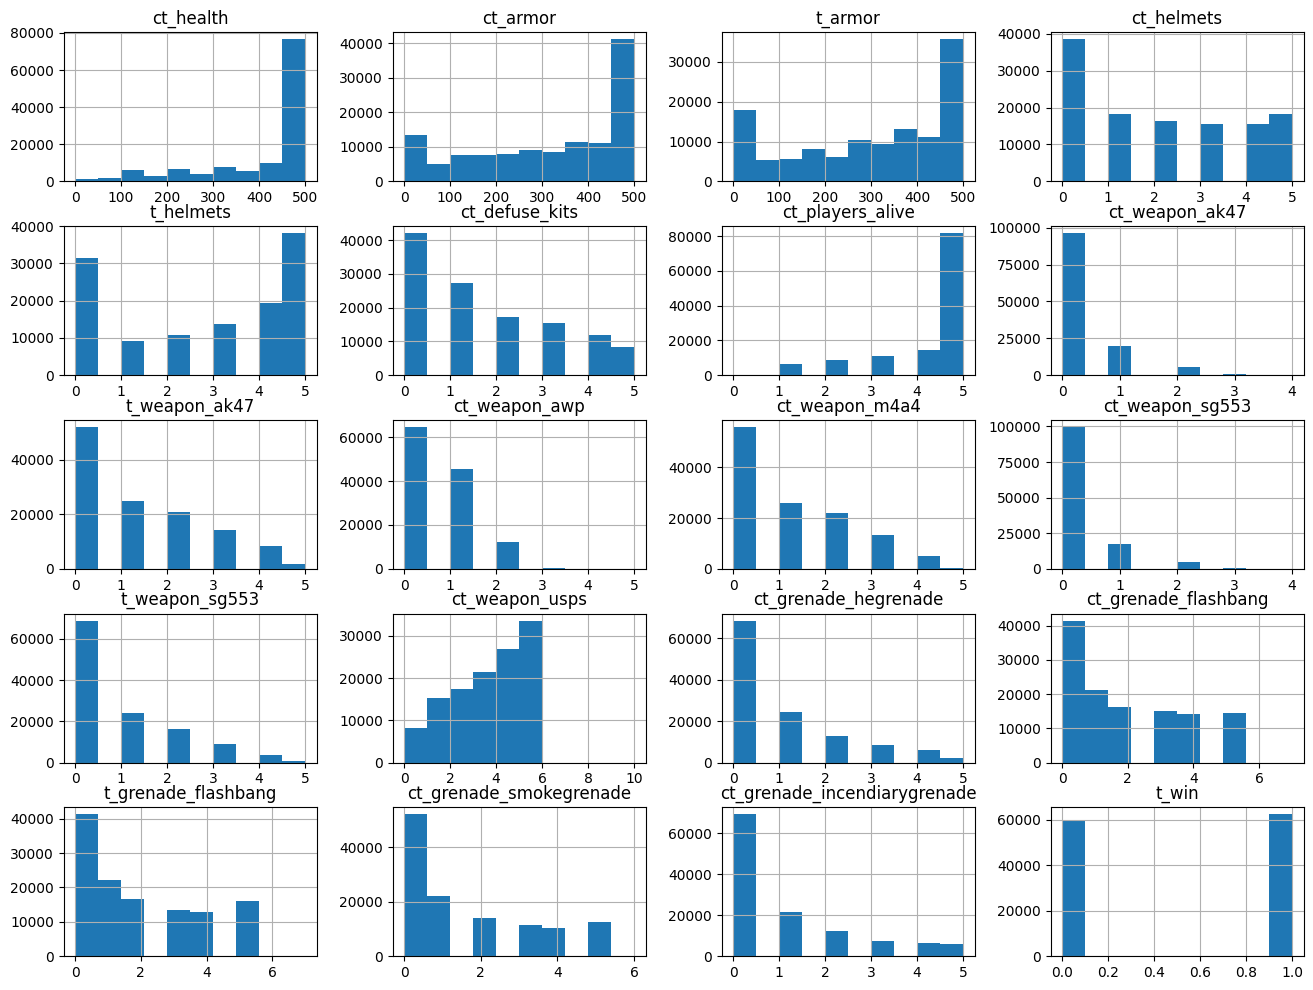

In [28]:
df_selected.hist(figsize=(16,12))

In [29]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ct_health                     122410 non-null  float64
 1   ct_armor                      122410 non-null  float64
 2   t_armor                       122410 non-null  float64
 3   ct_helmets                    122410 non-null  float64
 4   t_helmets                     122410 non-null  float64
 5   ct_defuse_kits                122410 non-null  float64
 6   ct_players_alive              122410 non-null  float64
 7   ct_weapon_ak47                122410 non-null  float64
 8   t_weapon_ak47                 122410 non-null  float64
 9   ct_weapon_awp                 122410 non-null  float64
 10  ct_weapon_m4a4                122410 non-null  float64
 11  ct_weapon_sg553               122410 non-null  float64
 12  t_weapon_sg553                122410 non-nul

In [31]:
from sklearn.model_selection import train_test_split

x, y = df_selected.drop(["t_win"], axis=1), df_selected["t_win"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [32]:
len(x_train)

97928

In [33]:
len(y_train)

97928

In [34]:
len(x_test)

24482

In [35]:
len(y_test)

24482

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [37]:
knn.score(x_test_scaled, y_test)

0.7630912507148109

In [38]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_neighbors": list(range(5, 17, 2)),
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier(n_jobs=4)

clf = RandomizedSearchCV(knn, param_grid, n_jobs=4, n_iter=3, verbose=2, cv=3)
clf.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=4), n_iter=3,
                   n_jobs=4,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [40]:
knn = clf.best_estimator_

In [41]:
knn.score(x_test_scaled, y_test)

0.7809002532472837

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=4)
forest.fit(x_train_scaled, y_train)

RandomForestClassifier(n_jobs=4)

In [43]:
forest.score(x_test_scaled, y_test)

0.8253410669062985

[CV] END ....................n_neighbors=7, weights=distance; total time=   2.9s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   2.8s
[CV] END ....................n_neighbors=7, weights=distance; total time=   2.9s
[CV] END ...................n_neighbors=13, weights=distance; total time=   2.9s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   2.9s
[CV] END ...................n_neighbors=13, weights=distance; total time=   2.9s
[CV] END ....................n_neighbors=7, weights=distance; total time=   2.9s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   2.8s
[CV] END ...................n_neighbors=13, weights=distance; total time=   2.4s


In [47]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(19,)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [48]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

x_train_scaled_train, x_valid, y_train_train, y_valid = train_test_split(x_train_scaled, y_train, test_size=0.15)

model.fit(x_train_scaled_train, y_train_train, epochs=30, callbacks=[early_stopping_cb], validation_data=(x_valid, y_valid))

Epoch 1/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 694us/step - accuracy: 0.7323 - loss: 0.4978 - val_accuracy: 0.7440 - val_loss: 0.4738
Epoch 2/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step - accuracy: 0.7468 - loss: 0.4742 - val_accuracy: 0.7468 - val_loss: 0.4734
Epoch 3/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 672us/step - accuracy: 0.7480 - loss: 0.4696 - val_accuracy: 0.7513 - val_loss: 0.4726
Epoch 4/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 677us/step - accuracy: 0.7509 - loss: 0.4665 - val_accuracy: 0.7430 - val_loss: 0.4715
Epoch 5/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - accuracy: 0.7518 - loss: 0.4657 - val_accuracy: 0.7490 - val_loss: 0.4674
Epoch 6/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 661us/step - accuracy: 0.7564 - loss: 0.4607 - val_accuracy: 0.7500 - val_loss: 0.4678
Epoch 7/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 661us/step - accuracy: 0.7569 - loss: 0.4598 - val_accuracy: 0.7494 - val_loss: 0.4669
Epoch 8/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 680us/step - accuracy: 0.7557 -

In [50]:
model.evaluate(x_test_scaled, y_test)

766/766 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7520 - loss: 0.4719


[0.4759901762008667, 0.7489992380142212]